# Init

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

pd.options.display.max_rows = 10

In [2]:
reviews = pd.read_csv('Reviews.csv', nrows=10000)

# 1. Top-10 Reviewer

In [3]:
cols = ['UserId', 'ProfileName', 'Score']
func = {'Score count': 'count', 'Score mean': 'mean'}
top_reviewer_series = reviews[cols].groupby(cols[:2])[cols[2]].agg(func).sort_values('Score count', ascending=False)
top_reviewer_series.head(10)

C:\Users\KJCHEN\Miniconda3\envs\tf_mkl\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


# 2. Plot score distribution for the user with the most number of reviews

''

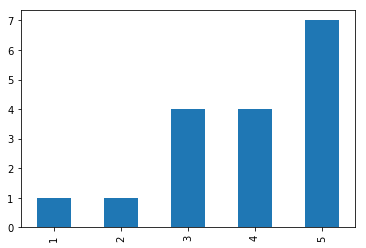

In [8]:
user_id, profile_name = top_reviewer_series.index.values[0]
cond = (reviews['UserId'] == user_id) & (reviews['ProfileName'] == profile_name)
col = 'Score'
reviews.loc[cond][col].value_counts().sort_index().plot.bar()
;

# 3. Plot pandas Series DataFrame (Time->Date)

''

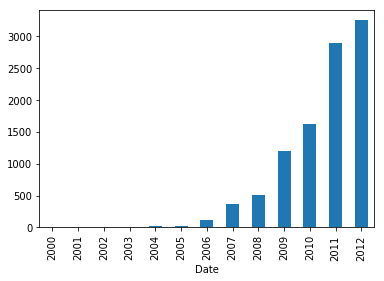

In [5]:
reviews['Date'] = pd.to_datetime(reviews['Time'], unit='s')

s = reviews.groupby(pd.Grouper(key='Date', freq='1Y')).size().sort_index()

ax = s.plot.bar()
ax.set_xticklabels(s.index.strftime('%Y'))
;

# 4. Plot HeatMap using seaborn

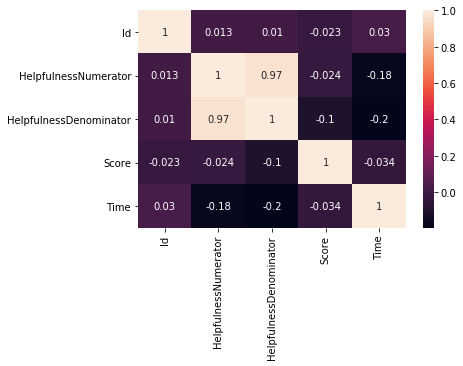

In [6]:
cols = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
sns.heatmap(reviews[cols].corr(), annot=True)

# 5. Helpful percent

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B9036E5C0>]],
      dtype=object)

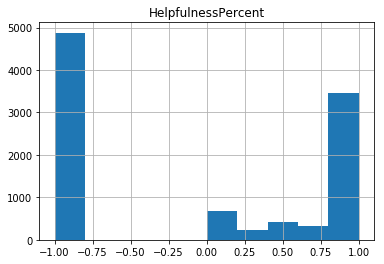

In [7]:
hn, hd, hp = 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessPercent'

reviews[hp] = (reviews[hn] / reviews[hd]).fillna(-1)

invalid = (reviews[hn] > reviews[hd])
reviews.loc[invalid, hp] = -1

reviews.hist(column=[hp])